In [197]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Generating Synthetic data for Sine Wave Function

In [198]:
torch.manual_seed(0)
x = torch.randn(1000000, 1)
y = torch.sin(x)
# feature engineering
x = torch.column_stack([x**i for i in range(1, 50, 2)])
x_train = x[:800000]
y_train = y[:800000]
x_test = x[800000:]
y_test = y[800000:]

\begin{equation}
\sin(x) = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!} x^{2n+1}
\end{equation}


\begin{equation}
\begin{align*}
\sin(x) &= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots + {(-1)^n}\frac{x^n}{n!} = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!} x^{2n+1}
\end{align*}
\end{equation}

Created features on x like $x^3$, $x^5$, $x^7$, $x^9$,... $x^{2n+1}$


In [199]:
x.shape, y.shape

(torch.Size([1000000, 25]), torch.Size([1000000, 1]))

### Designing the Model Architecture

In [200]:
model = nn.Sequential(
    nn.Linear(x.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Tanh()
)

### Loss Functions and Optimizers

In [201]:
# Loss Function
loss = nn.MSELoss()
# Optimizer
opt = optim.Adam(model.parameters(), lr=0.0001)

#### Training

In [202]:
epochs = 1000
batch_size = 100000
loss_list = []
for epoch in range(epochs):
    for batch in range(0, x_train.shape[0], batch_size):
        x = x_train[batch:batch+batch_size]
        y = y_train[batch:batch+batch_size]
        y_pred = model(x)
        l = loss(y_pred, y)
        opt.zero_grad()
        l.backward()
        opt.step()
    loss_list.append(l)
    if epoch % 20 == 0:
        print(f"For epoch {epoch} loss is {l.item()}")

For epoch 0 loss is 0.5683562755584717
For epoch 20 loss is 0.43956321477890015
For epoch 40 loss is 0.3804299235343933
For epoch 60 loss is 0.26549187302589417
For epoch 80 loss is 0.14563171565532684
For epoch 100 loss is 0.11780024319887161
For epoch 120 loss is 0.09279187768697739
For epoch 140 loss is 0.07034705579280853
For epoch 160 loss is 0.05245741084218025
For epoch 180 loss is 0.038567766547203064
For epoch 200 loss is 0.028766032308340073
For epoch 220 loss is 0.02203543670475483
For epoch 240 loss is 0.017570026218891144
For epoch 260 loss is 0.014715893194079399
For epoch 280 loss is 0.012957718223333359
For epoch 300 loss is 0.011909187771379948
For epoch 320 loss is 0.01129916775971651
For epoch 340 loss is 0.01094520278275013
For epoch 360 loss is 0.010732263326644897
For epoch 380 loss is 0.010592295788228512
For epoch 400 loss is 0.010487834922969341
For epoch 420 loss is 0.010399317368865013
For epoch 440 loss is 0.01031530275940895
For epoch 460 loss is 0.01023036

In [214]:
with torch.no_grad():
    y_pred = model(x_train)
train_accuracy = torch.mean((y_pred - y_train)**2)
print(f"Train Accuracy {train_accuracy}")

Train Accuracy 0.008992664515972137


In [215]:
with torch.no_grad():
    y_pred = model(x_test)
test_accuracy = torch.mean((y_pred - y_test)**2)
print(f"Test Accuracy {test_accuracy}")

Test Accuracy 0.009229390881955624


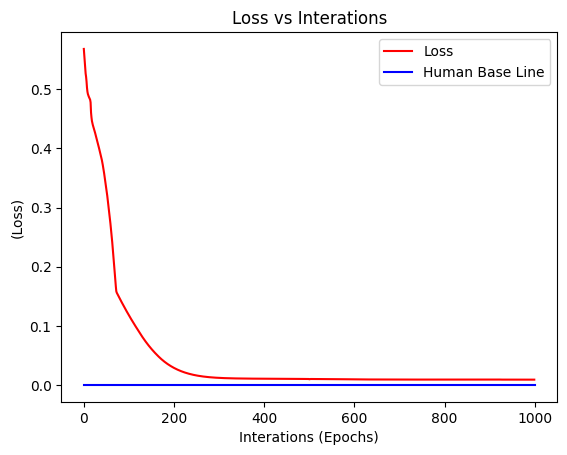

In [221]:
fig, ax = plt.subplots()

# Plot the line
ax.plot(loss_list, color='red', label='Loss')
ax.plot([0, 1000], [0.0000000001, 0.0000000001], color='blue', label='Human Base Line')
# Add title and axis labels
ax.set_title('Loss vs Interations')
ax.set_xlabel('Interations (Epochs)')
ax.set_ylabel('(Loss)')
ax.legend()

# Display the plot
plt.show()

If the human base line for this problem is e-10 as we now how to calculate sin(x). Then we can say that our model is doing a good job to learn the Sine function but it is underfitting.

One thing we can do to reduce underfitting in this case is to increase the number of hidden layers and neurons in each layer and also increse the no of features.